# Data Cleaning and Merge

In [134]:
from pyforest import *

## Default Rate Data

In [154]:
dRate = pd.read_csv(r'/Users/dillorr/defaultRate/dillon/defaultRate/data/cohortDefault2016/dRateCopy.csv', encoding = "ISO-8859-1")
dRate.columns

<IPython.core.display.Javascript object>

Index(['OPEID', 'Name', 'Address', 'City', 'State', 'StateDesc', 'ZipCode',
       'ZipExt', 'ProgLength', 'SchoolType', 'Year1', 'Num1', 'Denom1',
       'DRate1', 'PRate1', 'EthnicCode', 'CongDis', 'Region',
       'AverageorGreaterthan30', 'Year2', 'Num2', 'Denom2', 'DRate2', 'PRate2',
       'Year3', 'Num3', 'Denom3', 'DRate3', 'PRate3'],
      dtype='object')

In [155]:
# keep useful features
dRateReduced = dRate.drop(columns=['Year2', 'Num2', 'Denom2', 'DRate2', 'PRate2', 'Year3', 'Num3', 'Denom3', 'DRate3', 'PRate3'])
dRateReduced.columns

Index(['OPEID', 'Name', 'Address', 'City', 'State', 'StateDesc', 'ZipCode',
       'ZipExt', 'ProgLength', 'SchoolType', 'Year1', 'Num1', 'Denom1',
       'DRate1', 'PRate1', 'EthnicCode', 'CongDis', 'Region',
       'AverageorGreaterthan30'],
      dtype='object')

In [156]:
dRateReduced.head()

,OPEID,Name,Address,City,State,StateDesc,ZipCode,ZipExt,ProgLength,SchoolType,Year1,Num1,Denom1,DRate1,PRate1,EthnicCode,CongDis,Region,AverageorGreaterthan30
0,1002,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY ...,4900 MERIDIAN STREET ...,NORMAL,AL,ALABAMA ...,35762,1357,8,Public,2016,342,1875,18.2,A,2,5,4,0
1,1003,FAULKNER UNIVERSITY ...,5345 ATLANTA HIGHWAY ...,MONTGOMERY,AL,ALABAMA ...,36109,3398,8,Private,2016,172,1371,12.5,A,5,2,4,0
2,1004,UNIVERSITY OF MONTEVALLO ...,PALMER CIRCLE ...,MONTEVALLO,AL,ALABAMA ...,35115,6000,8,Public,2016,56,757,7.3,A,5,6,4,0
3,1005,ALABAMA STATE UNIVERSITY ...,915 SOUTH JACKSON STREET ...,MONTGOMERY,AL,ALABAMA ...,36104,5714,8,Public,2016,382,1874,20.3,P,2,3,4,0
4,1007,CENTRAL ALABAMA COMMUNITY COLLEGE ...,1675 CHEROKEE ROAD ...,ALEXANDER CITY,AL,ALABAMA ...,35010,0,5,Public,2016,92,468,19.6,P,5,3,4,0


In [157]:
# export to dRateReduced
# dRateReduced.to_csv('/Users/dillorr/defaultRate/dillon/defaultRate/data/cohortDefault2016/dRateReduced.csv', index=False)

## City vs County Data

In [158]:
cities = pd.read_csv(r'/Users/dillorr/defaultRate/dillon/defaultRate/data/usCities/usCities.csv', encoding = "ISO-8859-1")
cities.columns

<IPython.core.display.Javascript object>

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'county_fips_all', 'county_name_all', 'lat', 'lng',
       'population', 'density', 'source', 'military', 'incorporated',
       'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [159]:
citiesReduced = cities.drop(columns = ['city_ascii', 'state_id', 'county_fips', 'county_fips_all', 'population', 'density', 
                                        'source', 'military', 'incorporated', 'timezone', 'ranking', 'id', 'county_name_all'
                                       ])
citiesReduced.rename(columns={'city': 'City', 'state_name': 'StateDesc', 'county_name': 'County', 'lat' : 'CityLatitude', 'lng' : 'CityLongitude' }, inplace=True)
citiesReduced.head()

,City,StateDesc,County,CityLatitude,CityLongitude,zips
0,South Creek,Washington,Pierce,46.9994,-122.3921,98580 98387 98338
1,Roslyn,Washington,Kittitas,47.2507,-121.0989,98941 98068 98925
2,Sprague,Washington,Lincoln,47.3048,-117.9713,99032
3,Gig Harbor,Washington,Pierce,47.3352,-122.5968,98332 98335
4,Lake Cassidy,Washington,Snohomish,48.0639,-122.0920,98223 98258 98270


In [160]:
# export to citiesReduced
# citiesReduced.to_csv('/Users/dillorr/defaultRate/dillon/defaultRate/data/usCities/citiesReduced.csv', index=False)

In [161]:
# take just cities, states, and counties
stateCountyCity = citiesReduced[['StateDesc', 'County','City']].copy()
# stateCountyCitySortedByState = stateCountyCity.sort_values(by=['StateDesc'], ascending = True)
# stateCountyCitySortedByState.head()
# stateCountyCitySortedByState.to_csv('/Users/dillorr/defaultRate/dillon/defaultRate/data/usCities/stateCountyCity.csv', index=False)

<IPython.core.display.Javascript object>

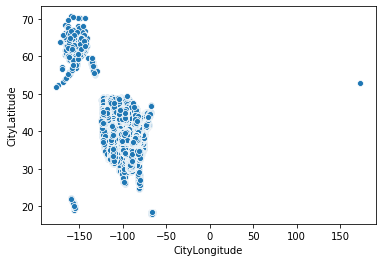

In [162]:
# scatter plot of cities
sns.scatterplot(x="CityLongitude", y="CityLatitude", data=citiesReduced)

<IPython.core.display.Javascript object>

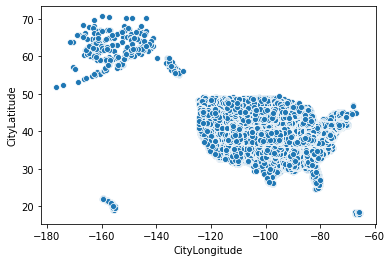

In [163]:
#remove outlier for visual (Attu Station, AK)
citiesReducedTrimmed = citiesReduced[citiesReduced.CityLongitude <= 150]

# scatter plot of cities
sns.scatterplot(x="CityLongitude", y="CityLatitude", data=citiesReducedTrimmed)

## Merge Datasets

In [164]:
dRateReduced.head()

,OPEID,Name,Address,City,State,StateDesc,ZipCode,ZipExt,ProgLength,SchoolType,Year1,Num1,Denom1,DRate1,PRate1,EthnicCode,CongDis,Region,AverageorGreaterthan30
0,1002,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY ...,4900 MERIDIAN STREET ...,NORMAL,AL,ALABAMA ...,35762,1357,8,Public,2016,342,1875,18.2,A,2,5,4,0
1,1003,FAULKNER UNIVERSITY ...,5345 ATLANTA HIGHWAY ...,MONTGOMERY,AL,ALABAMA ...,36109,3398,8,Private,2016,172,1371,12.5,A,5,2,4,0
2,1004,UNIVERSITY OF MONTEVALLO ...,PALMER CIRCLE ...,MONTEVALLO,AL,ALABAMA ...,35115,6000,8,Public,2016,56,757,7.3,A,5,6,4,0
3,1005,ALABAMA STATE UNIVERSITY ...,915 SOUTH JACKSON STREET ...,MONTGOMERY,AL,ALABAMA ...,36104,5714,8,Public,2016,382,1874,20.3,P,2,3,4,0
4,1007,CENTRAL ALABAMA COMMUNITY COLLEGE ...,1675 CHEROKEE ROAD ...,ALEXANDER CITY,AL,ALABAMA ...,35010,0,5,Public,2016,92,468,19.6,P,5,3,4,0


In [146]:
stateCountyCity.head()

,StateDesc,County,City
0,Washington,Pierce,South Creek
1,Washington,Kittitas,Roslyn
2,Washington,Lincoln,Sprague
3,Washington,Pierce,Gig Harbor
4,Washington,Snohomish,Lake Cassidy


In [169]:
# make datasets same case
stateCountyCity['StateDesc'] = stateCountyCity['StateDesc'].str.upper()
stateCountyCity['City'] = stateCountyCity['City'].str.upper()
stateCountyCity['County'] = stateCountyCity['County'].str.upper()
stateCountyCity.head()

,StateDesc,County,City
0,WASHINGTON,PIERCE,SOUTH CREEK
1,WASHINGTON,KITTITAS,ROSLYN
2,WASHINGTON,LINCOLN,SPRAGUE
3,WASHINGTON,PIERCE,GIG HARBOR
4,WASHINGTON,SNOHOMISH,LAKE CASSIDY


In [148]:
# check to see if Normal is in dataset
# stateCountyCity[stateCountyCity.City == 'MONTGOMERY']

In [149]:
# testing unique values in city series

# uniques = stateCountyCity.City.unique()
# uniques.sort()
# for x in uniques:
#     print(x)

In [168]:
# strips out whitespace
dRateReduced['City'] = dRateReduced.City.str.strip()
dRateReduced['StateDesc'] = dRateReduced.StateDesc.str.strip()

#creating unique id
dRateReduced['label'] = dRateReduced.StateDesc + '-' + dRateReduced.City

#create mapping dictionary
sc_dict = stateCountyCity.County.to_dict()

dRateReduced['County'] = dRateReduced.label.apply(lambda x: sc_dict[x] if x in sc_dict else None)
dRateReduced.head()

,OPEID,Name,Address,City,State,StateDesc,ZipCode,ZipExt,ProgLength,SchoolType,...,Num1,Denom1,DRate1,PRate1,EthnicCode,CongDis,Region,AverageorGreaterthan30,label,County
0,1002,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY ...,4900 MERIDIAN STREET ...,NORMAL,AL,ALABAMA,35762,1357,8,Public,...,342,1875,18.2,A,2,5,4,0,ALABAMA-NORMAL,None
1,1003,FAULKNER UNIVERSITY ...,5345 ATLANTA HIGHWAY ...,MONTGOMERY,AL,ALABAMA,36109,3398,8,Private,...,172,1371,12.5,A,5,2,4,0,ALABAMA-MONTGOMERY,None
2,1004,UNIVERSITY OF MONTEVALLO ...,PALMER CIRCLE ...,MONTEVALLO,AL,ALABAMA,35115,6000,8,Public,...,56,757,7.3,A,5,6,4,0,ALABAMA-MONTEVALLO,None
3,1005,ALABAMA STATE UNIVERSITY ...,915 SOUTH JACKSON STREET ...,MONTGOMERY,AL,ALABAMA,36104,5714,8,Public,...,382,1874,20.3,P,2,3,4,0,ALABAMA-MONTGOMERY,None
4,1007,CENTRAL ALABAMA COMMUNITY COLLEGE ...,1675 CHEROKEE ROAD ...,ALEXANDER CITY,AL,ALABAMA,35010,0,5,Public,...,92,468,19.6,P,5,3,4,0,ALABAMA-ALEXANDER CITY,None


In [167]:
# testing with National University
dRateReduced.loc[dRateReduced['OPEID'] == 11460]

,OPEID,Name,Address,City,State,StateDesc,ZipCode,ZipExt,ProgLength,SchoolType,...,Num1,Denom1,DRate1,PRate1,EthnicCode,CongDis,Region,AverageorGreaterthan30,label,County
2687,11460,NATIONAL UNIVERSITY ...,11255 NORTH TORREY PINES ROAD ...,LA JOLLA,CA,CALIFORNIA,92037,1011,8,Private,...,310,6234,4.9,A,5,53,9,0,CALIFORNIA-LA JOLLA,None
